<a href="https://colab.research.google.com/github/keinisha/Habitable_Exoplanets/blob/main/Exoplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 247 kB 5.0 MB/s 
     |████████████████████████████████| 41 kB 221 kB/s 
     |████████████████████████████████| 4.5 MB 52.4 MB/s 
     |████████████████████████████████| 98 kB 8.6 MB/s 
     |████████████████████████████████| 832 kB 59.4 MB/s 
     |████████████████████████████████| 48 kB 6.1 MB/s 
     |████████████████████████████████| 4.1 MB 40.4 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11375 sha256=ee5a4e98049832313e8f99ca4e976c9cb8ddca08f42efa734894572cf30c64c1
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50467 sha256=866e0811bc74880839fbb278bc5bf708b9b76ccb9ab5fd401ddc7d5a8dc86678
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995db

In [ ]:
import numpy as np

In [ ]:
from lightkurve import search_targetpixelfile as stpf

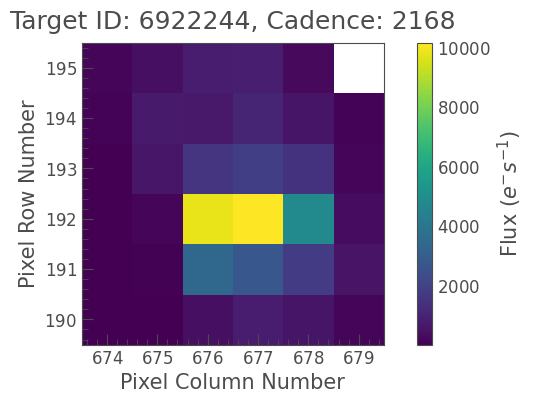

In [ ]:
pf = stpf('KIC 6922244', mission='Kepler', quarter=1).download(quality_bitmask='hardest')
pf.plot(frame=1000)

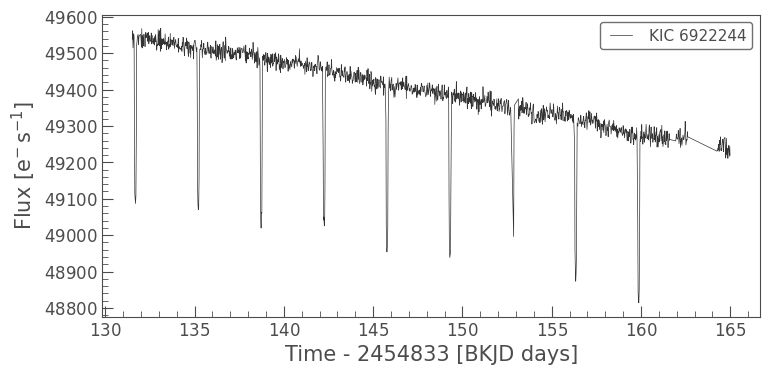

In [ ]:
lc = pf.to_lightcurve(aperture_mask='all')
lc.plot()

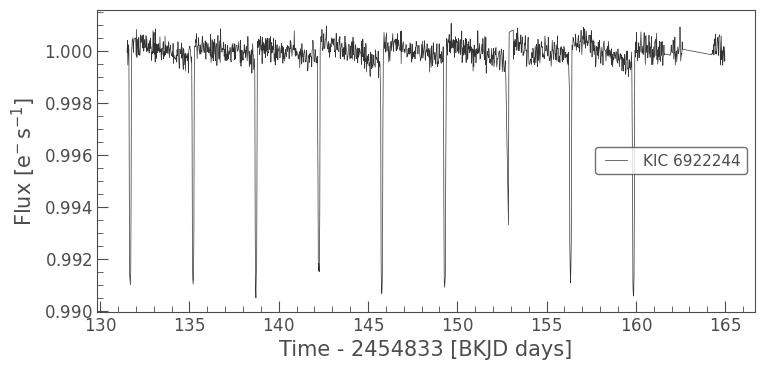

In [ ]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()

In [ ]:
# find the frequency of repetition using periodogram
periodogram = flat_lc.to_periodogram(period=np.arange(0.3, 4, 0.001)) # from 0.3 days to 5 days with difference of 0.001 days
best_period = periodogram.period_at_max_power
best_period

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
Method has been changed from 'fast' to 'slow' to allow for this.


<Quantity 3.52 d>

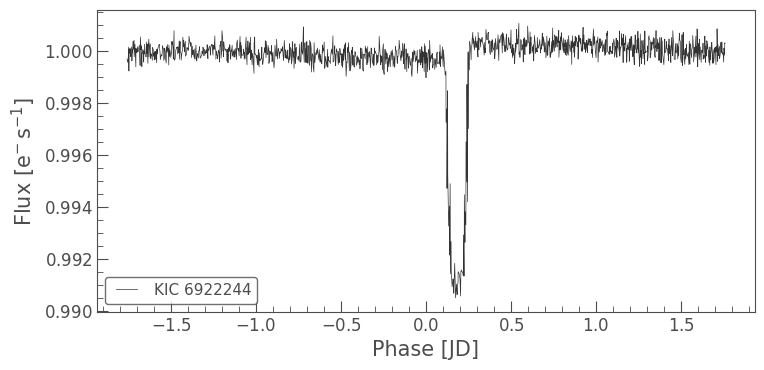

In [ ]:
fold_lc = flat_lc.fold(3.52)
fold_lc.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  """Entry point for launching an IPython kernel.


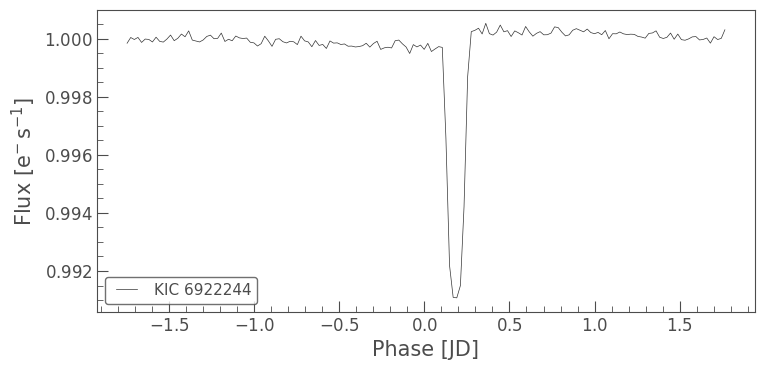

In [ ]:
bin_lc = fold_lc.bin(binsize=10)
bin_lc.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  """Entry point for launching an IPython kernel.


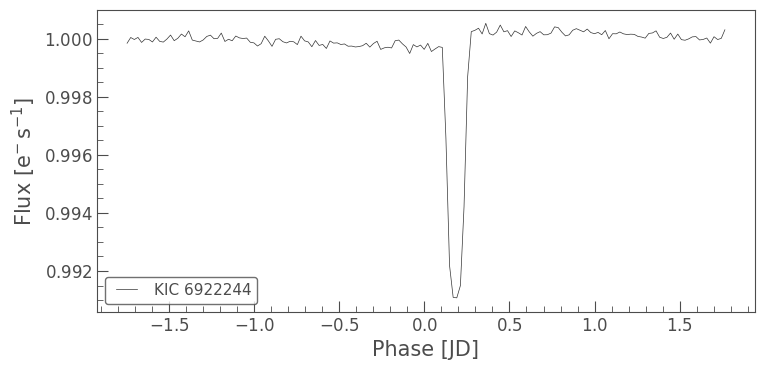

In [ ]:
lc.remove_nans().flatten(window_length=401).fold(period=3.52).bin(binsize=10).plot()